<img src='https://assets.brand.microsites.netflix.io/assets/493f5bba-81a4-11e9-bf79-066b49664af6_cm_1440w.png?v=49' width='415' style="float: left; margin" /> <img src='https://lumiere-a.akamaihd.net/v1/images/2_disney_logo_29e79241_fbd045f0.png?optimize=false' width='350' style="float: right; margin"/> 

# Project 3: Web APIs & NLP: Netflix & DisneyPlus Subreddit Analysis
---

# Problem Statement

Reddit is a social media platform that hosts discussion boards (called Subreddits) on various topics ranging from entertainment, business, politics, and self-help to name a few. Users are able to write posts that other users can interact with by either commenting or "up-voting" posts they like. 

Streaming services, like Netflix and DisneyPlus, are subscription based websites that studios now offer to give viewers direct access to previous and upcoming films & TV shows. As of March 2021, only Sony does not have its own independent streaming service. 

For this project, posts have been scrapped from the Netflix and DisneyPlus Subreddits in order to develop a classification model that will predict which Subreddit the post originated.

---

# Contents

- [Executive Summary](#Executive-Summary)
- [Assumptions](#Assumptions)
- [Data Wrangling](#Data-Wrangling)
- [Data Cleaning](#Data-Cleaning)
- [NLP Pre-Processing](#NLP-Pre-Processing)
 - [Tokenizing](#Tokenizing)
 - [Lemmatizing](#Lemmatizing)
 - [Stemming](#Stemming)
 - [Stop-Word Removal](#Stop-Word-Removal)
 - [Join Lemmatized & Tokenized Columns](#Join-Lemmatized-&-Tokenized-Columns)
 - [Sentiment Analysis](#Sentiment-Analysis)
 - [CountVectorizer](#CountVectorizer)
 - [TF-IDF](#TF-IDF)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
 - [Correlation Grid](#Correlation-Grid)
 - [Top 15 Words](#Top-15-Words)
 - [Top 15 TF-IDF Features](#Top-15-TF-IDF-Features)
 - [Most Frequent Words Distribution](#Most-Frequent-Words-Distribution)
 - [Word Count and Length by Subreddit](#Word-Count-and-Length-by-Subreddit)
 - [Sentiment Score](#Sentiment-Score)
 - [Up-Vote Ratio](#Up-Vote-Ratio)
 - [Spoiler Count](#Spoiler-Count)
- [Modeling](#Modeling)
 - [Random Forest](#Random-Forest)
   - [Random Forest Baseline](#Random-Forest-Baseline)
   - [GridSearchCV Random Forest](#GridSearchCV-Random-Forest)
   - [Random Forest w/ Feature Engineering](#Random-Forest-w/-Feature-Engineering)
   - [Remove Features With Low Importance for Random Forest GridSearch Model](#Remove-Features-With-Low-Importance-for-Rnaomd-Forest-GridSeach-Model)
   - [Removed Features with Feature Engineering and GridSearchCV](#Removed-Features-with-Feature-Engineering-and-GridSearchCV)
 - [K-Neareast Neighbors](#K-Nearest-Neighbors)
   - [KNN Baseline](#KNN-Baseline)
   - [KNN w/ GridSearchCV](#KNN-w/-GridSearchCV)
 - [Bernoulli Naive Bayes](#Bernoulli-Naive-Bayes)
- [Conclusion & Recommendations](#Conclusion-&-Recommendations)
 
---

# Executive Summary

To scrape the data required, I used Reddit's API and imported the data in JSON format. The data was pulled from the [r/Netflix](https://www.reddit.com/r/netflix/) and [r/DisneyPlus](https://www.reddit.com/r/DisneyPlus) Subreddit pages. Using Reddit's API data dictionary, I chose to focus on the author, id, upvote_ratio, spoiler, selftext, title, and subreddit features. I chose these Subreddits as opposed to other streaming service's Subreddits because these two have the highest number of subscribers 

    NOTE: Amazon Prime has more subscribers than DisneyPlus, however there is no data that specifies how many Prime users utilize Prime Video so I did not consider it when considering which rankings had the highest number of subscribers.

Next, I used pandas to clean the DataFrame that was collected. I also checked to confirm that the function I created to scrape data did not duplicate any rows. I also created features that counted the length and word count from the title and selftext features. After initial cleaning I began using Natural Language Processing techniques to create more features based on the title and selftext features that had been pulled. 

Once all the cleaning was complete, I began exploring the data to see what trends (if any) can be found to separate the two Subreddits. I chose to check if any features had strong correlation (none had over 50%) and then examined which words came up most frequently. Once I established which words were most prominent I then examined how those words were distributed between the two subreddits. In the below image of the top fifteen words by count, I am able to get a sense of the themes that are most often discussed on both subreddits: new movies or TV shows/seasons/episodes. We can answer the second part of the problem statement with this image and understand that these subreddits are most often used to discuss the newest films or shows.

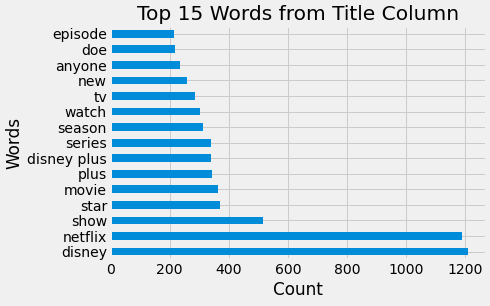

I then examined the word count and length of posts to see how they were distributed between Subreddits. Finally, I examined the sentiment score and up-vote ratio to see if any trends could be found between Subreddits and I found that over 80% of posts with an up-vote ratio below 0.5 and a sentiment score (compounded) above 0 were from r/Netflix (image below for reference).

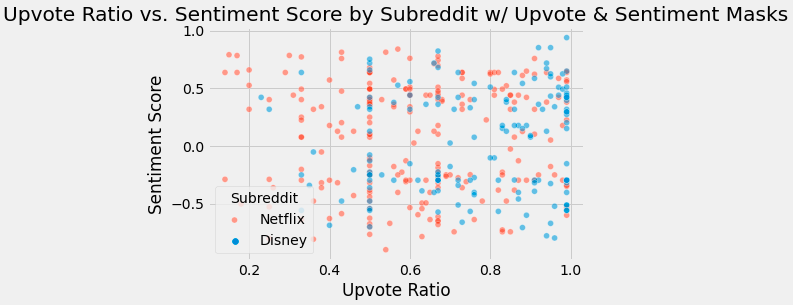

Finally I began modeling. Before I began I decided to focus on creating the model with the highest accuracy score: I wanted to maximize as many correct predictions and ultimately felt that focusing models on this score would provide me with the strongest model. 

I chose three different types of models: Random Forest, K-Nearest Neighbors, and Bernoulli Naive Bayes. I generated a baseline score for each of these models and Random Forest had the highest baseline score so much of my model adjustments came on that model type. I used GridSearchCV, built a Pipeline for feature engineering and cut back on features to only use those with high importance. I was able to build a model that predicted which subreddit a post came from with 84.6% accuracy. 

---

# Background

Streaming your favorite TV shows or movies has become normalized thanks in large part to Netflix launching its streaming service in 2007. Due in large part to the success Netflix is having, among other reasons, nearly every studio has released their own streaming service. Now instead of paying a cable provider for access to shows and movies, viewers pay studios directly for access to their catalog of shows/movies and their upcoming shows/movies. Currently the two pure-streaming services with the highest number of subscribers are Netflix (200 million) and Disney+ (90 million) [[source](https://www.cnbc.com/2021/02/18/streaming-wars-how-to-tell-whos-winning-and-whos-losing.html)]. (NOTE: Pure-streaming implies a Studio that's core business is related to producing TV & films; by this definition Amazon is not included despite having over 150 million Amazon Prime subscribers).

One byproduct of this shift is the lack of viewership numebrs that the Neilsen Ratings would have previously provided. In the days before streaming, TiVo, and DVR, viewers had to watch shows at the exact time they were on (what a nightmare!). As each of these new technologies came into the world, the Neilsen Ratings became less and less reliable. With the shift to streaming, studios are given access to viewership data in real time, and can choose to disclose (or not disclose) what those numbers are to the public. 

If you'd like to read more about what all these streaming services and the data that is collected as a result, I wrote an article on Medium about how these streamers are beginning to use the data [here](https://qghaemi23.medium.com/the-streamers-and-their-data-adf5571deea4).

Watercooler conversations the day after a hit show were a place to avoid if you missed an episode of a show. With the growth of social media, fans began to congregate online to have these watercooler discussions. Fans of shows would take to various forms of social media to engage deeper with their favorite shows and the legitimacy of social media as a measurement of fan engagement was born. 

Reddit is a social media platform that hosts numerous Subreddits that are focused on different topics. One of the most discussed Subreddit pages in 2021 is r/wallstreetbets, but there are also Subreddits for sports, music, business, shows, movies, and streaming services. Th discussions on these Subreddits range from sharing news, having discussions about recent events, or sharing grievences out in the open. 

---

# Assumptions

A key assumption that has been made in this project is that all posts come from a human and are not generated by a 'bot'. A bot is defined as an autonomous program that can generate texts that human users can read and reply to. The prevelence of bots has grown as more people congregate online and it can be difficult to track down who or what created the bot in question: a superfan of Netflix, someone with too much time on their hands, an aspiring writer trying to sell their show, or a competitor trying to sully the waters.

Another initial assumption that I am making is the words 'netflix' and 'disney' are not exclusively in their respective subreddits. This assumption wil be tested when NLP is used on the posts and if the posts are found to have their respective subreddit names in every post they will need to be added as stopwords to prevent the model from overfitting.

---

# Data Wrangling

This section shows how the data was collected from the Netflix and DisneyPlus subreddits.

Using the following steps, I will create a function in order to more easily pull data from the Netflix and DisneyPlus Subreddits:

1) Set the URL

2) Set the Subreddits

3) Build a function that takes in url, subreddit, and number of observations to pull.

    1) Set initial parameters
    
    2) Use requests libary to get the data from the url and subreddit
    
    3) Specify the section of the data we need pulled from the json
    
    4) Build a DataFrame with the pulled data.
    
    5) Repeat until the length of the DataFrame is the length of the number in the input.

In [6]:
# import libraries for requesting data
import requests
import pandas as pd

#import libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# import NLP libraries needed for cleaning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import nltk

# import libraries for modeling
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [7]:
# create the reddit url
url = 'https://api.pushshift.io/reddit/search/submission?'
# create the netflix subreddit and disneyplus subreddit
subr_net = 'netflix'
subr_dp = 'disneyplus'

In order to more easily streamline the web scrapping process, I build the below function. This function follows all of the steps taken in order to scrape data from the url and subreddit defined. It will then pull out a maximum number of rows based on the final input of the function.

Because the request is only able to pull 100 rows at once, the function will have a for loop to allow each pull to append onto a larger dataframe that will then have specific rows pulled from it. This step could have been included in the function but I wanted to preserve as much data from the scrape before beginning to trim data.

In [8]:
# adjust the params
# use requests.get(url, params) and save the var here as res
# check res.status_code == 200 to continue (maybe dont include in function?)
# save the data as data = res.json()
# pull just the data class from the data var as so: posts = data['data']
# create a new df w this new post data as so: new_df = pd.DataFrame(posts)
# concat the new df cols that are new_df[['subreddit', 'selftext', 'title']] onto the netflix df
# if the len of the netflix['title'] col < 2000 pull the utc code from this most recent posts var like so:
    # posts[0]['created_utc']

In [9]:
def web_scraper(url, subreddit, number):
    params = {
        'subreddit': subreddit,
        'size': 100
    }
    
    # use requests.get(url, params) and save as res
    res = requests.get(url, params)
    
    # save the data
    data = res.json()
    
    # pull just the data class from the data var
    posts = data['data']
    
    # create a new df w this data
    df = pd.DataFrame(posts)
    
    # while loop to get the length of this df to 2000
    while len(df['title']) < number:
        
        # for loop to get the lowest utc value from posts
        for i in range(len(posts)):
            utc = []
            utc.append(posts[i]['created_utc'])
            min_utc = min(utc)
    
        #add the 'before' argument to the params dict
        params['before'] = min_utc
        
        # create a new requests.get w new params
        res = requests.get(url, params)
        
        # save new data
        data = res.json()
        
        # pull data class w new post var
        posts = data['data']
        
        # concat the dataframe version of posts to the df that was just created
        df = pd.concat([df, pd.DataFrame(posts)])
    
    #return full df
    return df

In [10]:
# use the function to pull from the netflix subreddit and confirm the shape of the df
netflix = web_scraper(url, subr_net, 3000)
netflix.shape

(3000, 79)

In [11]:
# check the netlfix df
netflix.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,media_metadata,author_flair_background_color,author_flair_text_color,banned_by,link_flair_css_class,link_flair_template_id,link_flair_text,edited,gilded,author_cakeday
0,[],False,ricardojavier1980,None,[],None,text,t2_6d60kmqk,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Cookn8r,None,[],None,text,t2_egg7k,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Kari-pekka,None,[],None,text,t2_3ha5o9mn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,-chrispy-,None,[],None,text,t2_b8gez,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,G00dEase,None,[],None,text,t2_7kuqzzrm,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# do the same as above but for the disneyplus subreddit
disneyplus = web_scraper(url, subr_dp, 3000)
disneyplus.shape

(3000, 86)

In [13]:
# check the disneyplus df
disneyplus.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,media_metadata,banned_by,collections,discussion_type,suggested_sort,link_flair_css_class,edited,author_cakeday,gilded,distinguished
0,[],False,WanderingZed,None,[],None,text,t2_116j0b,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,MrConor212,None,"[{'e': 'text', 't': 'Darth Vader'}]",Darth Vader,richtext,t2_7amu67t,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Sensitive_Ad_7761,None,[],None,text,t2_57qkp0lu,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Electrical_Cabinet_7,None,[],None,text,t2_34ytqr33,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,vikediveijo,None,[],None,text,t2_44r6co0z,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Based on the shape of the netflix and disneyplus DataFrames above, there are more columns in the netflix DataFrame and I will need to select which columns to focus on.

In my initial pull I did not include the 'author' and 'id' columns but found that I would return an irregular number of duplicate rows. When I included these features I found that there were no duplicate rows. 

In [14]:
# based on initial EDA, will focus on the following columns in both dfs
cols = ['author', 'id', 'upvote_ratio', 'spoiler', 'selftext', 'title', 'subreddit']

In [15]:
# concat the two df's using the col variable created above
df = pd.concat([netflix[cols], disneyplus[cols]])
# confirm the two df's merged properly, should have a shape of 6K rows and 7 cols
df.shape
# reset index of df as they are repeating the 0-99 pattern based on how the data was pulled
df.reset_index(drop=True, inplace=True)

Instead of keeping the two DataFrames separate, I chose to concat them in order to have a single DataFrame with all the data I want to run EDA and model with. Should I need to pull more data I can re-run the above function with a larger number. To begin I chose to begin with 3000 rows from each Subreddit but can come back to adjust to a higher number should I need more observations.

# Data Cleaning

This section focuses on data cleaning. This includes checking for duplicate rows, checking the distrubution of the spoiler column, change the subreddit values to binary numbers, fill in missing values, and adding word count and length columns.

NLP pre-processing steps and changing the title and selftext column values into word vectors will be done in a following section.

In [16]:
# take an initial look at the df and quickly see what needs to be checked/changed
df.info()
# check the number of duplicate rows we have in the df
# confirm the spoiler col has values that are not only False
# change subreddit: netflix:1, disneyPlus:0
# then go thru the selftext and title cols wit ha wordvectorizer
# fill the na values in selftext with empty strings
# use regex to remove any urls from the title and selftext cols

# add a column for length for both title col and selftext
# add a column for word count for both title col and selftext

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        6000 non-null   object 
 1   id            6000 non-null   object 
 2   upvote_ratio  6000 non-null   float64
 3   spoiler       6000 non-null   bool   
 4   selftext      5827 non-null   object 
 5   title         6000 non-null   object 
 6   subreddit     6000 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 287.2+ KB


In [17]:
# check the number of duplicate rows
df[df.duplicated()]
# there are no duplicate rows - amazing!

,author,id,upvote_ratio,spoiler,selftext,title,subreddit


In [18]:
# confirm spoiler col has values other than False
df.spoiler.value_counts()

False    5814
True      186
Name: spoiler, dtype: int64

In [19]:
# change the spoiler values to 1 for true and 2 for false
df['spoiler'] = df['spoiler'].astype(int)
# confirm the switch was made
df.spoiler.value_counts()

0    5814
1     186
Name: spoiler, dtype: int64

In [20]:
# change netflix to 1 and disneyplus to 0 in subreddit col
df['subreddit']=df.subreddit.map({'netflix':1, 'DisneyPlus': 0})
# there should still be 3000 values for each
df.subreddit.value_counts()

0    3000
1    3000
Name: subreddit, dtype: int64

In [21]:
# fill the na values in selftext with empty strings
df['selftext'].fillna('', inplace=True)
# confirm there are no missing values in the selftext col
df.selftext.isnull().sum()

0

In [22]:
# use regex to remove any urls from the title and selftext cols
# found the below code on stack overflow but made changes for this data
# df['A'] = df['A'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['title'] = df['title'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'com\S+', '', regex=True)
# run the same code but on selftext col
df['selftext'] = df['selftext'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'com\S+', '', regex=True)

In [23]:
# add a column for length for title
df['title_length'] = df['title'].map(len)

In [24]:
# add a column for length for selftext
df['selftext_length'] = df['selftext'].map(len)

In [25]:
# add a column for word count for title
df['title_word_count'] = df['title'].map(lambda x: len(x.split()))

In [26]:
# add a column for word count for selftext
df['selftext_word_count'] = df['selftext'].map(lambda x: len(x.split()))

In [27]:
# check the df again before entering the Word2Vec world
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               6000 non-null   object 
 1   id                   6000 non-null   object 
 2   upvote_ratio         6000 non-null   float64
 3   spoiler              6000 non-null   int64  
 4   selftext             6000 non-null   object 
 5   title                6000 non-null   object 
 6   subreddit            6000 non-null   int64  
 7   title_length         6000 non-null   int64  
 8   selftext_length      6000 non-null   int64  
 9   title_word_count     6000 non-null   int64  
 10  selftext_word_count  6000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 515.8+ KB


In [28]:
df.head()

,author,id,upvote_ratio,spoiler,selftext,title,subreddit,title_length,selftext_length,title_word_count,selftext_word_count
0,ricardojavier1980,m1kyns,1.0,1,,Me review on altered carbon episode 3... what ...,1,197,0,39,0
1,Cookn8r,m1ko1v,1.0,0,[removed],Robin Wrights new movie,1,23,9,4,1
2,Kari-pekka,m1kcos,1.0,0,Does anyone know if netflix movies are 1080p? ...,are netflix movies and series only 1080p?,1,41,305,7,57
3,-chrispy-,m1jgg8,1.0,0,"The wife, kids, and I have finished this one a...","Similar to ""Stranger Things""",1,28,190,4,33
4,G00dEase,m1idih,1.0,0,I watched it today &amp; absolutely loved it. ...,East side sushi is beautiful &amp; I highly re...,1,108,195,19,35


# NLP Pre-Processing

This section follows the NLP Pre-Processing steps of removing special characters, tokenizing, lemmatization, and stop-word removal.

I did an initial removal of special characters above in order to better represent the word count and length columns so that is not found in this section.

Once all of the documents had been tokenized and lemmatized/stemmed I examined them to see if there was a difference between the lemmatized and stemmed values and if there are none I will drop one of these columns and continue to the vectorization step once I have re-joined the lemmatized/stemmed values.

I also created a sentiment column that shares the sentiment of each post.

After the above steps were taken. I chose to build out the DataFrame further in order to include CountVectorizer and TF-IDF for EDA in the following section. 

### Tokenizing

In [29]:
# I found the following code on stack overflow https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame
# i used this code to create new columns with the tokenized version of each the title col and selftext col

df['tokenized_title'] = df.apply(lambda row: nltk.word_tokenize(row['title'].lower()), axis=1)
df['tokenized_selftext'] = df.apply(lambda row: nltk.word_tokenize(row['selftext'].lower()), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               6000 non-null   object 
 1   id                   6000 non-null   object 
 2   upvote_ratio         6000 non-null   float64
 3   spoiler              6000 non-null   int64  
 4   selftext             6000 non-null   object 
 5   title                6000 non-null   object 
 6   subreddit            6000 non-null   int64  
 7   title_length         6000 non-null   int64  
 8   selftext_length      6000 non-null   int64  
 9   title_word_count     6000 non-null   int64  
 10  selftext_word_count  6000 non-null   int64  
 11  tokenized_title      6000 non-null   object 
 12  tokenized_selftext   6000 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 609.5+ KB


In [30]:
df['tokenized_title'].head()

0    [me, review, on, altered, carbon, episode, 3, ...
1                         [robin, wrights, new, movie]
2    [are, netflix, movies, and, series, only, 1080...
3              [similar, to, ``, stranger, things, '']
4    [east, side, sushi, is, beautiful, &, amp, ;, ...
Name: tokenized_title, dtype: object

### Lemmatizing

In [31]:
# i used the function found at https://stackoverflow.com/questions/59567357/lemmatize-tokenised-column-in-pandas
# in order to create a function that will lemmatizer the tokenized columns

def lemmatize_text(text):
    
    # insatiate the lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # use a list comp to loop through all of the values that will be inputed and lemmatize them
    return [lemmatizer.lemmatize(w) for w in text]

# create a lemmatized column for each title and selftext
df['lemmatized_title'] = df['tokenized_title'].apply(lemmatize_text)
df['lemmatized_selftext'] = df['tokenized_selftext'].apply(lemmatize_text)

In [32]:
# run a quick check between the lemmatized and tokenized column to see how many words were changed
print(df['tokenized_title'].head(), df['lemmatized_title'].head())

0    [me, review, on, altered, carbon, episode, 3, ...
1                         [robin, wrights, new, movie]
2    [are, netflix, movies, and, series, only, 1080...
3              [similar, to, ``, stranger, things, '']
4    [east, side, sushi, is, beautiful, &, amp, ;, ...
Name: tokenized_title, dtype: object 0    [me, review, on, altered, carbon, episode, 3, ...
1                          [robin, wright, new, movie]
2    [are, netflix, movie, and, series, only, 1080p...
3               [similar, to, ``, stranger, thing, '']
4    [east, side, sushi, is, beautiful, &, amp, ;, ...
Name: lemmatized_title, dtype: object


I did notice some plural words were cut down, but I also noticed that some of the words that have not been changed that I expected would be changed (ex. is 'altered' in the row index 0 above). However other values have been changed (ex. movies in row index 2).

I will run a stemming function in the same was as above and see if results differ. If not I will move forward with the changes that have been made.

### Stemming

In [33]:
def stem_text(text):
    
    # insatiate the lemmatizer
    stemmer = PorterStemmer()
    
    # use a list comp to loop through all of the values that will be inputed and lemmatize them
    return [stemmer.stem(w) for w in text]

# create a lemmatized column for each title and selftext
df['stem_title'] = df['tokenized_title'].apply(lemmatize_text)
df['stem_selftext'] = df['tokenized_selftext'].apply(lemmatize_text)

In [34]:
print(df['lemmatized_title'].head(), df['stem_title'].head())

0    [me, review, on, altered, carbon, episode, 3, ...
1                          [robin, wright, new, movie]
2    [are, netflix, movie, and, series, only, 1080p...
3               [similar, to, ``, stranger, thing, '']
4    [east, side, sushi, is, beautiful, &, amp, ;, ...
Name: lemmatized_title, dtype: object 0    [me, review, on, altered, carbon, episode, 3, ...
1                          [robin, wright, new, movie]
2    [are, netflix, movie, and, series, only, 1080p...
3               [similar, to, ``, stranger, thing, '']
4    [east, side, sushi, is, beautiful, &, amp, ;, ...
Name: stem_title, dtype: object


As of now it looks like both of these columns have the same values, I will check to confirm this and if that is the case I will drop one column and focus on the other for data exploration and modeling.

### Stop-Word Removal

For stopwords, I chose to simply remove them from the tokenized, lemmatized, and stemmed columns. I am also preparing for the possibility that the words 'netflix' and 'disney' will need to be added as stopwords which is why I am creating the stopwords variable here.

I chose not keep the integrity of the title and self-text columns as I know the processes that will come will allow me to tokenized and remove stopwords from those columns. Given the minimal impact lemmatization and stemming have had above, I am not worried about the integrity of 

In [35]:
sw = stopwords.words('english')

In [36]:
df.columns

Index(['author', 'id', 'upvote_ratio', 'spoiler', 'selftext', 'title',
       'subreddit', 'title_length', 'selftext_length', 'title_word_count',
       'selftext_word_count', 'tokenized_title', 'tokenized_selftext',
       'lemmatized_title', 'lemmatized_selftext', 'stem_title',
       'stem_selftext'],
      dtype='object')

In [37]:
# I found the following code on stack overflow
# test['tweet'].apply(lambda x: [item for item in x if item not in stop])

# will create a function based on that to streamline the process
def stopword_removal(col):
    return df[col].apply(lambda x: [item for item in x if item not in sw])

In [38]:
# run the above function on the tokenized, lemmatized and stemmed columns
df['tokenized_title'] = stopword_removal('tokenized_title')
df['tokenized_selftext'] = stopword_removal('tokenized_selftext')
df['lemmatized_title'] = stopword_removal('lemmatized_title')
df['lemmatized_selftext'] = stopword_removal('lemmatized_selftext')
df['stem_title'] = stopword_removal('stem_title')
df['stem_selftext'] = stopword_removal('stem_selftext')

### Join Lemmatized & Tokenized Columns

This section takes the Lemmatized and Stemmed columns from Title and Selftext and joins those as full strings instead of lists of strings. This is done in order to perform CountVectorizer and TF-IDF on the Lemmatized and Stemmed words.

In [39]:
# use .map and a lambda function on the 4 columns that will be used later
df['lemmatized_title'] = df['lemmatized_title'].map(lambda x: ' '.join(x))
df['lemmatized_selftext'] = df['lemmatized_selftext'].map(lambda x: ' '.join(x))
df['stem_title'] = df['stem_title'].map(lambda x: ' '.join(x))
df['stem_selftext'] = df['stem_selftext'].map(lambda x: ' '.join(x))

Now that all the lemmatized and stemmed columns are joined, I want to check to see how many are different as I will only use one of each type in order to build out the function more.

In [40]:
# check if title cols are equal to each other
df['lemmatized_title'].equals(df['stem_title'])

True

In [41]:
# check if selftext cols are equal to each other
df['lemmatized_selftext'].equals(df['stem_selftext'])

True

In [42]:
# expect to return false when checking selftext vs title col
df['lemmatized_selftext'].equals(df['lemmatized_title'])

False

In [43]:
# expect to return false when checking title col vs lemmatized title col
df['lemmatized_title'].equals(df['title'])

False

Both of the selftext and title columns came up as True when I checked if they are equal to each other. I used checks between the lemmatized selftext/title columns and a check between the original title column and lemmatized title column as confirmations that .equals is giving valid results. 

I will drop the stemmed columns from the dataframe as they are identical to the lemmatized cols. I will use the lemmatized col to perform deeper NLP.

In [44]:
df.drop(columns=['stem_title', 'stem_selftext'], inplace=True)

### Sentiment Analysis

I wanted to include a sentiment score for each title document. I chose to specifically pull the compound score for each entry and save that as a new column. I am not sure if this will be useful for building out the model but would rather have this data handy and just drop that column when the time comes.

In [45]:
# i found the following code https://stackoverflow.com/questions/61608057/output-vader-sentiment-scores-in-columns-based-on-dataframe-rows-of-tweets

# insatiate the sentiment analyzer
sent = SentimentIntensityAnalyzer()

# will streamline the creation of the compount sentiment col and can add the other scores if I desire
df['title_sentiment_compound'] = [sent.polarity_scores(x)['compound'] for x in df['title']]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author                    6000 non-null   object 
 1   id                        6000 non-null   object 
 2   upvote_ratio              6000 non-null   float64
 3   spoiler                   6000 non-null   int64  
 4   selftext                  6000 non-null   object 
 5   title                     6000 non-null   object 
 6   subreddit                 6000 non-null   int64  
 7   title_length              6000 non-null   int64  
 8   selftext_length           6000 non-null   int64  
 9   title_word_count          6000 non-null   int64  
 10  selftext_word_count       6000 non-null   int64  
 11  tokenized_title           6000 non-null   object 
 12  tokenized_selftext        6000 non-null   object 
 13  lemmatized_title          6000 non-null   object 
 14  lemmatiz

### CountVecotizer

In [47]:
# create a vectorizer function to easily run columns through and return a new df
def vectorizer(col, ngram_range, max_features, min_df, stopwords):
    
    # insatiate the CountVectorizer transformer
    cv = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords, max_features=max_features, min_df = min_df)
    
    # fit and transform the column
    vec = cv.fit_transform(df[col])
    
    # turn the transformed object into a df
    new_df = pd.DataFrame(vec.todense(), columns=cv.get_feature_names())
    
    return new_df

In [48]:
# run the above function on the lemmatized title and selftext cols
title_vec_df = vectorizer('lemmatized_title', (1,2), 40, 2, sw)
selftext_vec_df = vectorizer('lemmatized_selftext', (1,2), 40, 2, sw)

In [49]:
# check the shape of the new df's that were made
title_vec_df.shape, selftext_vec_df.shape

((6000, 40), (6000, 40))

In [50]:
# show the top 30 words for each of the cleaned df
title_vec_df.sum().sort_values(ascending=False)

disney         1210
netflix        1187
show            516
star            369
movie           362
plus            342
disney plus     341
series          340
season          312
watch           304
tv              285
new             258
anyone          234
doe             218
episode         214
wandavision     177
like            169
app             162
amp             157
know            154
account         147
get             146
2021            145
ha              141
streaming       138
help            136
trailer         135
content         133
wa              129
good            125
subtitle        124
watching        120
issue           120
else            117
available       109
one             107
time            106
release         100
need             91
original         90
dtype: int64

In [51]:
selftext_vec_df.sum().sort_values(ascending=False)

removed      2510
netflix      1013
wa            817
show          811
like          619
watch         436
movie         430
gt            408
know          370
would         369
ha            358
episode       355
disney        345
one           332
get           312
anyone        303
watching      296
time          291
series        277
doe           272
tv            263
season        263
really        238
account       237
good          229
gt gt         228
new           224
something     218
even          214
also          207
want          205
make          204
thing         198
way           197
see           191
issue         190
people        188
app           187
deleted       186
think         184
dtype: int64

In [52]:
# join these two dfs to the original df. index is the same so this should be a streamlined process
df = df.join(title_vec_df)

In [53]:
# in order to properly merge selftext data, need to add a suffix to the col names
selftext_vec_df = selftext_vec_df.add_suffix('_selftext')

df = df.join(selftext_vec_df)

In [54]:
df.shape
# this looks to have worked as it added both the columns from the title and selftext vectorizers

(6000, 96)

As mentioned in the stopwords section above, both netflix and disney are in a significant number of posts. I am leaving them in for now but they could throw the model for a loop and make it too perfect, in which case I will need to add those to the list of stopwords.

### TF-IDF

In [55]:
# create a tfidf function akin to the count vectorizer function above

def tfidf(col, ngram_range, stopwords, max_features, min_df):
    
    # insatiate the tfidf transformer
    tfidf = TfidfVectorizer(ngram_range=ngram_range, stop_words=stopwords, max_features=max_features, min_df = min_df)
    
    # fit and transform the column
    tfidf_vec = tfidf.fit_transform(df[col])
    
    # turn the transformed object into a df
    new_df = pd.DataFrame(tfidf_vec.todense(), columns=tfidf.get_feature_names())
    
    return new_df

In [56]:
# get tfidf dfs for title and selftext
title_tfidfvec_df = tfidf('lemmatized_title', (1,2), sw, 40, 2)
selftext_tfidfvec_df = tfidf('lemmatized_selftext', (1,2), sw, 40, 2)

In [57]:
# confirm the shape of these new dfs
title_tfidfvec_df.shape, selftext_tfidfvec_df.shape

((6000, 40), (6000, 40))

In [58]:
title_tfidfvec_df.sum().sort_values(ascending=False)

netflix        718.539324
disney         623.607691
show           309.088802
star           247.494320
movie          231.854477
series         219.523475
season         212.441777
watch          196.364872
tv             184.734127
plus           177.596903
disney plus    176.732476
new            161.406581
episode        146.122008
doe            133.074027
anyone         131.153867
wandavision    128.891332
app            114.351471
account        109.801266
like           108.676334
amp            107.484554
2021           104.336920
streaming      102.310569
subtitle       101.663337
trailer         99.090932
get             99.018970
help            97.606933
content         94.517134
know            93.491202
ha              92.852802
good            91.291827
issue           90.461213
watching        87.577009
wa              79.385074
one             76.697483
available       75.367632
else            72.511787
time            71.814457
release         65.834839
need        

In [59]:
# add the tfidf cols to the df

# add a suffix to the values in the new df
title_tfidfvec_df = title_tfidfvec_df.add_suffix('_tfidf')
selftext_tfidfvec_df = selftext_tfidfvec_df.add_suffix('_tfidf_selftext')

# join the new dfs to the original df
df = df.join(title_tfidfvec_df)

df = df.join(selftext_tfidfvec_df)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 176 entries, author to would_tfidf_selftext
dtypes: float64(82), int64(86), object(8)
memory usage: 8.1+ MB


# Exploratory Data Analysis

In this section I will perform EDA on the full DataFrame as well as graphically show the results of the WordVectorizer. 

### Correlation Grid

This section will show which features have the strongest correlation with the subreddit column.

In [61]:
corr = df.corr()
corr[['subreddit']].sort_values(by='subreddit', ascending=False)

,subreddit
subreddit,1.000000
netflix,0.451699
netflix_tfidf,0.419550
netflix_tfidf_selftext,0.265782
show_tfidf_selftext,0.194642
...,...
plus,-0.239280
removed_selftext,-0.252869
removed_tfidf_selftext,-0.260689
disney_tfidf,-0.424031


Based on the above correlation grid, the netlifx, disney, netflix_tfidf, and disney_tfidf columns have the strongest correlation with the subreddit column. However, both of those correlations are below 50% which signals they are not as strong of correlations as one would assume. The remaining features are even lower which suggests some feature engineering may be required to strengthen the model.

### Top 15 Words

This section will graphically show the top 15 words in the title column and the self_text column

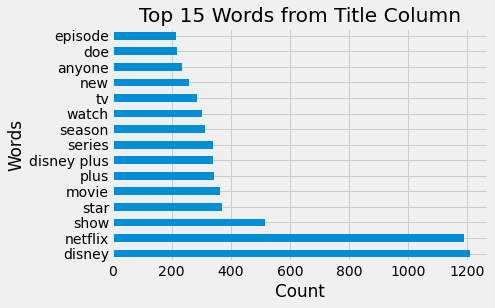

In [167]:
# plot horizontal barplots to show the top 15 words from the vectorized dataframes
title_vec_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Words from Title Column')
plt.ylabel('Words')
plt.xlabel("Count");

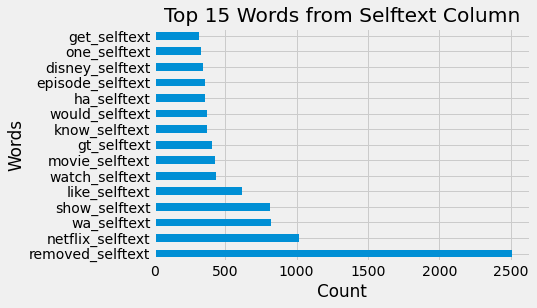

In [168]:
selftext_vec_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Words from Selftext Column')
plt.ylabel('Words')
plt.xlabel("Count");

From the above we can see that the words Netflix, Disney, tv, anyone, show, and watch show up on both lists. While this is insightful as a jumping off point, it would be helpful to see more of a distribution between the word counts in the two subreddits. For example, if all of the counts of netflix and disney can be found only in their respective subreddits, those two words have the strongest correlations with their respective subreddit.

Given how frequest the word removed is coming up in the selftext vectorizer, it is worth exploring to see what the distribution of that column is between the two subreddits. Show is another word that comes in at number three on both lists and will be explored.

### Top 15 TF-IDF Features

This section will graphically show the top 15 TF-IDF Features gathered from the title and selftext documents.

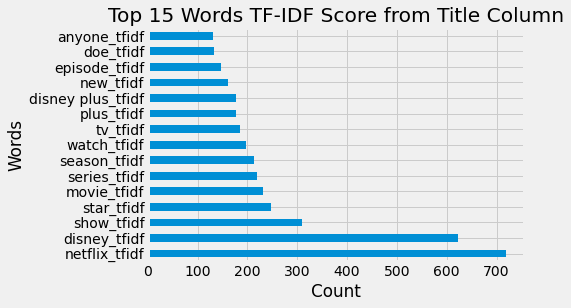

In [169]:
# horizonal barplots for title tfidf
title_tfidfvec_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Words TF-IDF Score from Title Column')
plt.ylabel('Words')
plt.xlabel("Count");

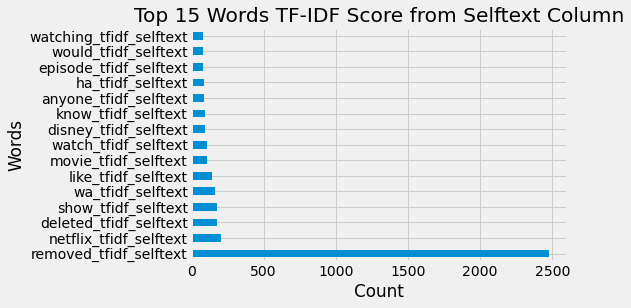

In [170]:
# barplot for selftext tfidf
selftext_tfidfvec_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')
plt.title('Top 15 Words TF-IDF Score from Selftext Column')
plt.ylabel('Words')
plt.xlabel("Count");

From the two tfidf charts we see the top words are identical. The main difference seen between the CountVectorizer and TF-IDF barplots is in the selftext_tfidf barplot: this barplot shows the words 'removed' has a significant impact on the 

### Most Frequent Words Distribution

This section will show the distribution of the three most frequent words: netflix, disney, and removed by subreddit.

''

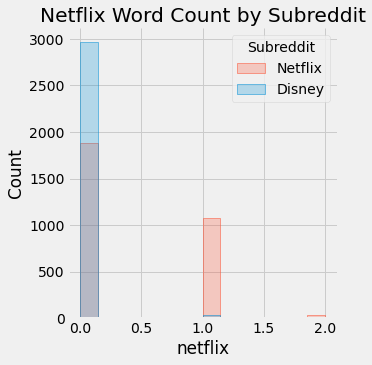

In [66]:
# show histograms for each disney and netflix wordcounts and set the hue to the subreddit to see if the distribution
sns.displot(df, x="netflix", hue="subreddit", element="step", legend=False)
# change the legend back to the original names of the subreddit
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Netflix Word Count by Subreddit')
;

Netflix was the second most common word in the title column. From the above it looks as though almost all instances of the word 'netflix' appearing in the title column were from the Netflix Subreddit, however over half of the posts did not include the word 'netflix'. This was also highlighted in the correlation grid above when the word 'netflix' had the highest correlation but it was still below 0.5 correlation with the Subreddit column.

''

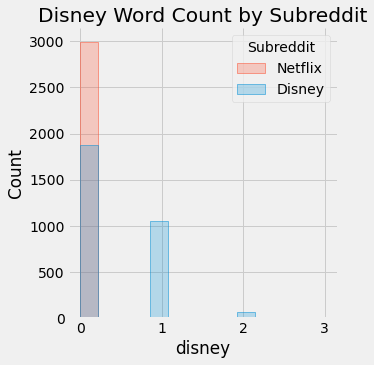

In [67]:
sns.displot(df, x="disney", hue="subreddit", element="step", legend=False)
# change the legend back to the original names of the subreddit
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Disney Word Count by Subreddit')
;

Based on the above stacked histograms, the previous assumption that the words netflix and disney show up in their respective subreddits is confirmed. While not ideal, it is worth noting that each of those words show up in less than half of the documents. This conclusion can be drawn by the 0 count for both values being above 1500. With more than half of the documents not including these words I will continue my analysis and keep those columns for modeling.

''

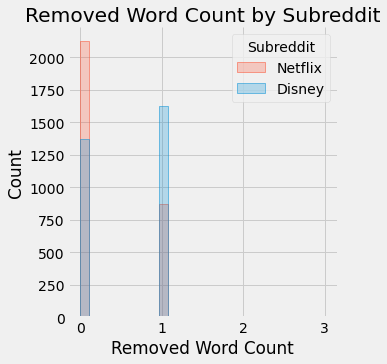

In [68]:
# show the distribution of removed_selftext column between subreddits
sns.displot(df, x="removed_selftext", hue="subreddit", element="step", legend=False)
# change the legend back to the original names of the subreddit
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Removed Word Count by Subreddit')
plt.xlabel('Removed Word Count')
;

''

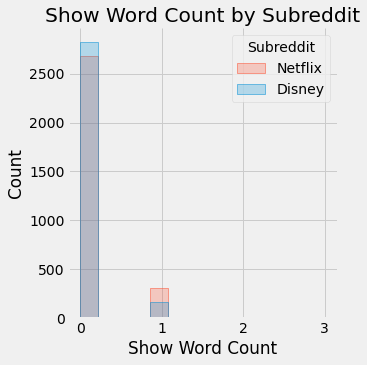

In [69]:
# show the distribution of show column between subreddits
sns.displot(df, x="show", hue="subreddit", element="step", legend=False)
# change the legend back to the original names of the subreddit
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Show Word Count by Subreddit')
plt.xlabel('Show Word Count')
;

''

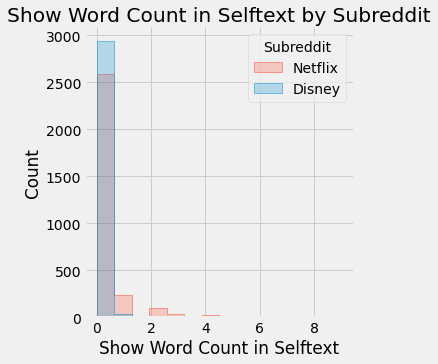

In [70]:
# show the distribution of show_selftext column between subreddits
sns.displot(df, x="show_selftext", hue="subreddit", element="step", legend=False)
# change the legend back to the original names of the subreddit
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Show Word Count in Selftext by Subreddit')
plt.xlabel('Show Word Count in Selftext')
;

From the above histogram, the word removed (originally coming from the subtext documents) show up roughly 66% more frequently in the Disney subreddit than they do in the Netflix subreddit. While this may skew data, it is not as extreme as what was seen with the words disney and netflix and this could help the model's predictive ability but adding some bias back while the other columns add variance.

The word show came up in the top three of both the title and selftext columns. From the above histograms for the word 'show', it appears that the word show appears more in Netflix subreddits than in Disney subreddits.

### Word Count and Length by Subreddit

This section will show the distribution of word count for posts by subreddit and distribution of length of posts by subreddit.

''

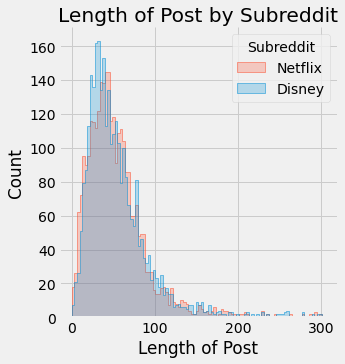

In [71]:
# create a histogram showing distribution of title length
sns.displot(df, x='title_length', hue='subreddit', element='step', legend=False, bins = 100)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Length of Post by Subreddit')
# change the x-axis label
plt.xlabel("Length of Post")
;

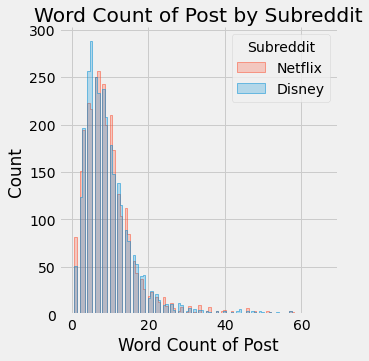

In [72]:
# create a histogram showing distribution of title word count
sns.displot(df, x='title_word_count', hue='subreddit', element='step', legend=False, bins = 100)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Word Count of Post by Subreddit')
# change the x-axis label
plt.xlabel("Word Count of Post");

The above histograms show that the distrbution for both the length and word count for posts are very similarly distributed. Both distributions skew right which concludes that the median is less than the average for both columns. Given the very similar distribution, another assumption being drawn now is that these columns will not help our model distinguish between posts and are more likely to add variance to the model and may cause the model to overfit.

While I did run similar histograms for the selftext columns of length and word_count, the distribution was much wider (as seen below). This is most likely caused by a few reasons: there were missing values in the selftext column so there is a higher number of 0 counts than in the title column and there are values above 1000 which are most likely outilers (will explore this in a boxplot).

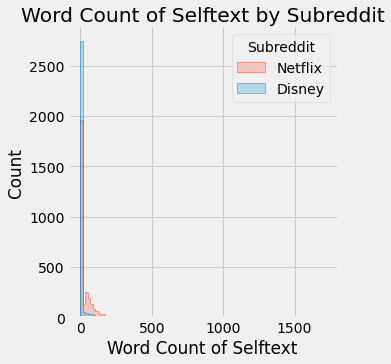

In [73]:
# create a histogram showing distribution of selftext word count
sns.displot(df, x='selftext_word_count', hue='subreddit', element='step', legend=False, bins = 100)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Word Count of Selftext by Subreddit')
# change the x-axis label
plt.xlabel("Word Count of Selftext");

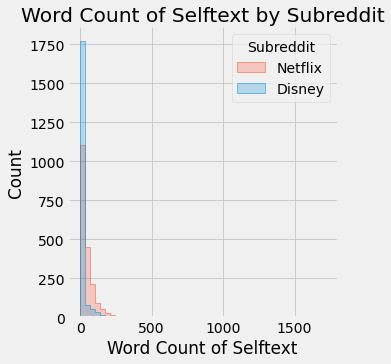

In [74]:
# recreate the above but use a mask to only include values > 0
selftext_word_count_mask = df[(df['selftext_word_count']>0)]
# create a histogram showing distribution of selftext word count
sns.displot(selftext_word_count_mask, x='selftext_word_count', hue='subreddit', element='step', legend=False, bins = 50)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Word Count of Selftext by Subreddit')
# change the x-axis label
plt.xlabel("Word Count of Selftext");


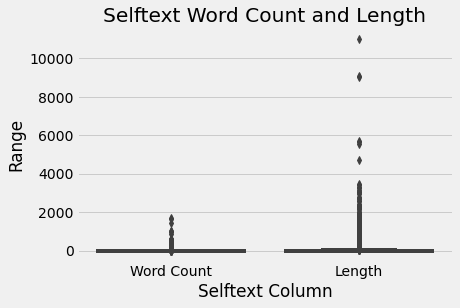

In [75]:
# create boxplots for the selftext_word_count and selftext_length col values to show outliers
sns.boxplot(data=[df[['selftext_word_count']], df[['selftext_length']]], orient='v')
# set a title for the boxplots
plt.title("Selftext Word Count and Length")
# change the x ticks
plt.xticks([0, 1], ['Word Count', 'Length'])
# add a label to the x and y axis
plt.xlabel('Selftext Column')
plt.ylabel('Range');

Based on the above, the selftext_word_count and selftext_length columns are full of outliers. Even when a mask is used to not include the rows that have a count of 0, the distribution still favors the lowest bin.

This suggests that these columns may cause the model to perform poorly and have a lower predictive quality. While masing out the outliers could be an option, I would like to preserve as much data as possible and may opt to not include thse columns as there are many other variables to consider already.

### Sentiment Score 

This section will explore the distribution of sentiment score by subreddit.

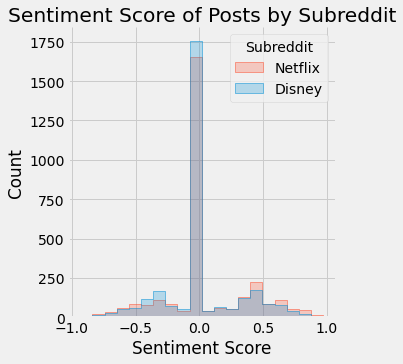

In [76]:
# show the distribution of title_sentiment_compound scores based on subreddit
sns.displot(df, x='title_sentiment_compound', hue='subreddit', element='step', legend=False, bins = 20)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Sentiment Score of Posts by Subreddit')
# change the x-axis label
plt.xlabel("Sentiment Score");

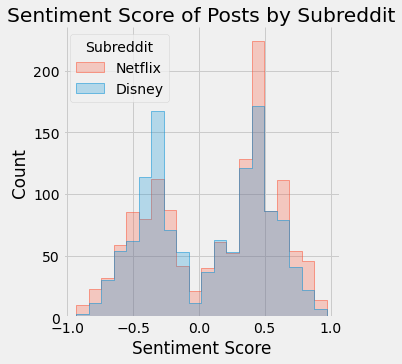

In [77]:
# recreate the above distribution but only show scores that are not 0
sentiment_score_mask = df[(df['title_sentiment_compound']!=0)]
# show the distribution of title_sentiment_compound scores based on subreddit
sns.displot(sentiment_score_mask, x='title_sentiment_compound', hue='subreddit', element='step', legend=False, bins = 20)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper left', labels=['Netflix', 'Disney'])
# add a title
plt.title('Sentiment Score of Posts by Subreddit')
# change the x-axis label
plt.xlabel("Sentiment Score");

Both of the above images show a majority of the sentiment scores sit around the value of 0. While the distribution of sentiment scores for both subreddits looks to be identical, the positive scores look to slightly favor the Netflix subreddit while the negative scores look to slightly favor the disney subreddit. 

When a mask removing all the 0 values is used, the majority of sentiment scores shifts to the bin signaling sentiment scores from 0.4-0.5. This shift helps to further highlight that the disitrbution of positive scores favors the Netflix subreddit.

The data above is not normally distributed as there looks to be three different peaks in the first graph, one for each of the possible outcomes: negative, neutral, and positive. For the second graph there are only two peaks, both of which are focused around negative and positive sentiment.

### Up-Vote Ratio

This section will show the distribution of up-vote scores by subreddits as well as the relationship (if any) between up-votes and sentiment score based on subreddit.

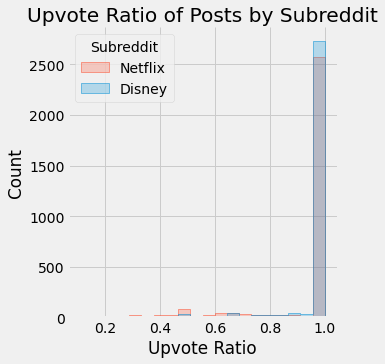

In [78]:
# show the distribution of upvote ratio based on subreddit
sns.displot(df, x='upvote_ratio', hue='subreddit', element='step', legend=False, bins = 20)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper left', labels=['Netflix', 'Disney'])
# add a title
plt.title('Upvote Ratio of Posts by Subreddit')
# change the x-axis label
plt.xlabel("Upvote Ratio");

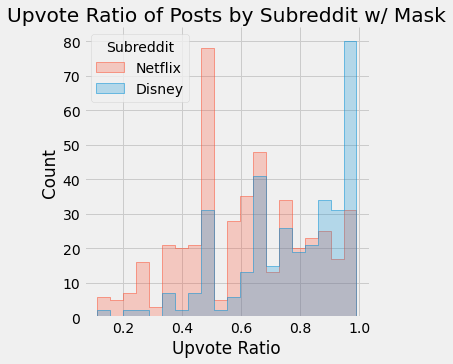

In [79]:
# recreate the above histogram w a mask excluding all of the upvote ratios with a value of 1
upvote_mask = df[(df['upvote_ratio'] < 1)]
sns.displot(upvote_mask, x='upvote_ratio', hue='subreddit', element='step', legend=False, bins = 20)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper left', labels=['Netflix', 'Disney'])
# add a title
plt.title('Upvote Ratio of Posts by Subreddit w/ Mask')
# change the x-axis label
plt.xlabel("Upvote Ratio");

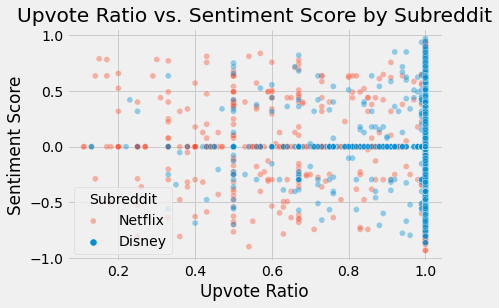

In [80]:
# show the distribution of upvote ratio based sentiment score & subreddit
sns.scatterplot(x=df['upvote_ratio'], y=df['title_sentiment_compound'], hue=df['subreddit'], alpha=0.4)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='lower left', labels=['Netflix', 'Disney'])
# add a title
plt.title('Upvote Ratio vs. Sentiment Score by Subreddit')
# change the x-axis label
plt.xlabel("Upvote Ratio")
# change y label
plt.ylabel("Sentiment Score");

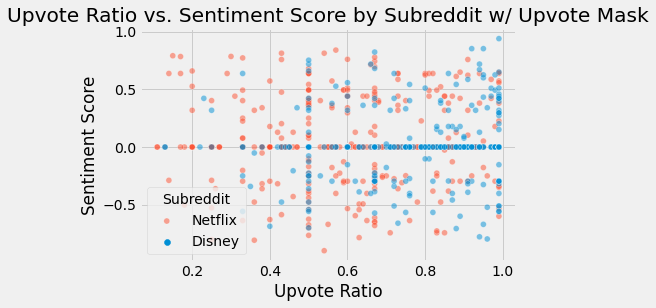

In [81]:
# show the distribution w the upvote mask
sns.scatterplot(
    x=upvote_mask['upvote_ratio'], 
    y=upvote_mask['title_sentiment_compound'], 
    hue=upvote_mask['subreddit'], alpha=0.5)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='lower left', labels=['Netflix', 'Disney'])
# add a title
plt.title('Upvote Ratio vs. Sentiment Score by Subreddit w/ Upvote Mask')
# change the x-axis label
plt.xlabel("Upvote Ratio")
# change y label
plt.ylabel("Sentiment Score");

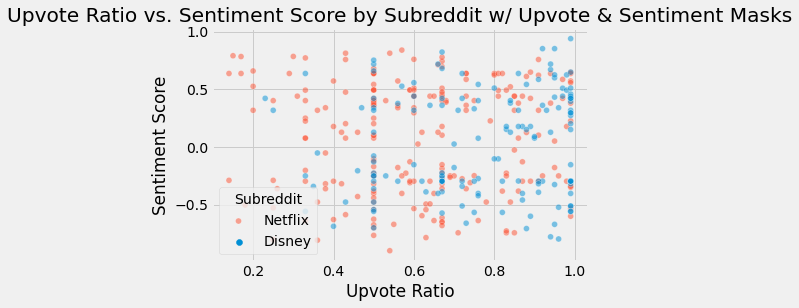

In [174]:
# show the distribution of upvote ratio based sentiment score & subreddit with the 2 masks previously created
upvote_sentiment_mask = sentiment_score_mask[(sentiment_score_mask['upvote_ratio']<1)]
sns.scatterplot(
    x=upvote_sentiment_mask['upvote_ratio'], 
    y=upvote_sentiment_mask['title_sentiment_compound'], 
    hue=upvote_sentiment_mask['subreddit'], alpha=0.5)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='lower left', labels=['Netflix', 'Disney'])
# add a title
plt.title('Upvote Ratio vs. Sentiment Score by Subreddit w/ Upvote & Sentiment Masks')
# change the x-axis label
plt.xlabel("Upvote Ratio")
# change y label
plt.ylabel("Sentiment Score");

In the first histogram showed a significant number of posts in both subreddits had an upvote ratio of 1. Once we removed those values we were able to see a cleaner image of the remaining distribution with the upvote mask (second histogram). This histogram suggests that there is a higher number of Disney posts with upvote ratios above 0.5 while Netflix sees a higher number of posts with an upvote ratio below 0.5.

The three scatterplots that follow show the upvote ratio vs. sentiment score. The original scatterplot has no masks and similar to the first histogram has a very high concentration of posts with an upvote ratio of 1. The subsequent posts use a mask to remove the upvote ratio scores of 1 (second scatterplot) and another mask to remove upvote ratio scores of 1 and sentiment scores of 0 (final scatterplot).

One conclusion from the scatterplots is there is a higher concentration of Netflix posts with an upvote ratio below 0.5 and sentiment score above 0. There are still Netflix posts that are scattered all around the graph, but the highest concentration of one subreddit is found in that area.

### Spoiler Count

This section will explore the distribution of spoilers by subreddit.

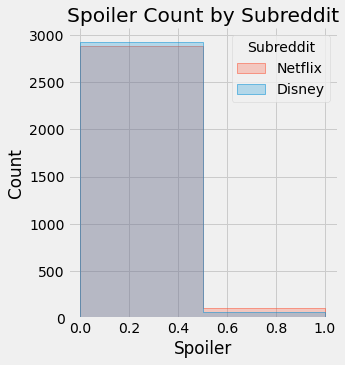

In [87]:
# show the distribution of spoilers based on subreddit
sns.displot(df, x='spoiler', hue='subreddit', element='step', legend=False, bins = 2)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Spoiler Count by Subreddit')
# change the x-axis label
plt.xlabel("Spoiler");

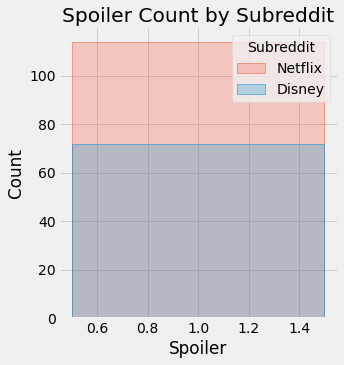

In [89]:
# use a mask to only show the distribution of those posts with spoilers
spoiler_mask = df[(df['spoiler'] == 1)]
sns.displot(spoiler_mask, x='spoiler', hue='subreddit', element='step', legend=False, bins = 1)
# create a legend that uses the name of the subreddits rather than the changed value
plt.legend(title='Subreddit', loc='upper right', labels=['Netflix', 'Disney'])
# add a title
plt.title('Spoiler Count by Subreddit')
# change the x-axis label
plt.xlabel("Spoiler");

From the two graphs above we can conclude that the spoiler column data is very evenly distributed. The second graph shows only the counts of posts deemed to have spoilers and Netflix edges Disney out by only one post. 

This specific column was chosen due to the nature of the subreddit: given these subreddits can have conversations about shows and movies released on the two platforms, it made sense to include this data to at least see how it was distributed. Given the small number of observations with a spoiler and the fact that each subreddit has about the same number of posts that are spoilers, this column may only end up providing more noise to the model and could be dropped.

# Modeling

In this section I will build a Random Forest Classifier, a KNN classifier, and a Bernoulli Naive Bayes classifier in order to predict which post comes from which subreddit. One the best Classifier is established between these three type, I will do further feature engineering and feature selection on the best model.

The models will be focused on obtaining the highest accuracy score. Given the nature of this model, it is more important to obtain as many true positive prediction (true positives are defined as correctly predicting the subreddit). Improperly classifying a subreddit is equally bad so we will need to focus on maximizing correct predictions.

The baseline accuracy score if the model predict just Netflix would be 50%: the goal is to build a model that has a higher accuracy score than this level.

## Random Forest

### Baseline Random Forest Model

This initial model was built with all numerical columns and default hyperparameters in the Random Forest Classifier. I chose to include random_state in all Random Forest models to make the results replicable.

In [91]:
# set the X and y variable
X = df.drop(columns=['author', 'id', 'selftext', 'title', 'subreddit', 'selftext_length', 'selftext_word_count',
                    'tokenized_title', 'tokenized_selftext', 'lemmatized_title', 'lemmatized_selftext'])
y = df['subreddit']

# run train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
# insatiate the model
rf = RandomForestClassifier(random_state=42)

# fit the model
rf.fit(X_train, y_train)

# get the score for training data and testing data
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9833333333333333, 0.8288888888888889)

               actual_positive  actual_negative
predicted_pos              722              157
predicted_neg              151              770
0.8288888888888889


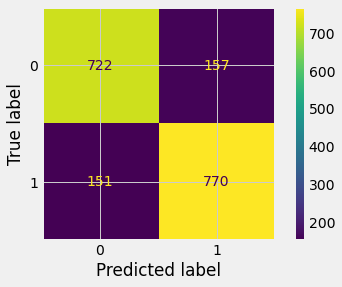

In [93]:
# get the predicted values of the baseline model
preds_baseline = rf.predict(X_test)

# set tn, fp, fn, tp
tn, fp, fn, tp = confusion_matrix(y_test, preds_baseline).ravel()

# show a confusion matrix with the results
print(plot_confusion_matrix(rf, X_test, y_test))

# create baseline results df
results_df = pd.DataFrame(confusion_matrix(y_test, preds_baseline),
                         columns=['actual_positive', 'actual_negative'],
                         index=['predicted_pos', 'predicted_neg'])
print(results_df)

# print accuracy score
print(accuracy_score(y_test, preds_baseline))

In [96]:
# check the feature importance of the features in this model
rf_model_features=list(zip(X_train.columns, rf.feature_importances_))
rf_model_features

[('upvote_ratio', 0.018348738452085088),
 ('spoiler', 0.0038935505086876306),
 ('title_length', 0.11733705789136659),
 ('title_word_count', 0.06515936890023953),
 ('title_sentiment_compound', 0.06030965952981153),
 ('2021', 0.00151808268352497),
 ('account', 0.0014220501915754031),
 ('amp', 0.001397364227648392),
 ('anyone', 0.0015875151525152002),
 ('app', 0.0016801890796541074),
 ('available', 0.0026474566520995253),
 ('content', 0.0016325854502965199),
 ('disney', 0.0878698310678596),
 ('disney plus', 0.007510840799674664),
 ('doe', 0.0015994087955461373),
 ('else', 0.0008416628569884331),
 ('episode', 0.003091777826626046),
 ('get', 0.0017928214167261044),
 ('good', 0.0026277547094488733),
 ('ha', 0.0016504686492444126),
 ('help', 0.001973662497308488),
 ('issue', 0.0020371996341415582),
 ('know', 0.0015663223199275781),
 ('like', 0.0023314884854943375),
 ('movie', 0.003773407734854831),
 ('need', 0.0010837418744701003),
 ('netflix', 0.06266100889540346),
 ('new', 0.002359825419726

Based on the baseline Random Forest model built above, the accuracy score is 82.8%. This model is stronger than the original baseline model. However given the disparity between accuracy scores on the training vs. testing data we can conclude that this model is overfit. 

When looking at feature importances, it is worth noting that most features had a score below 1%, signaling they had little importance in the overall model. Because so many features had such a low score, and the disparity between the training and testing accuracy score, removing features could be a way to greatly improve this model.

In the next model we will build out a Pipeline and Gridsearch over the parameters of the Random Forest Classifier.

### GridSearchCV Random Forest

This model will recreate a Random Forest model to find the best parameters for the model.

In [116]:
# set up the rf parameters dictionary
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 50, 100],
    'min_samples_split': [2, 3, 4],
    'random_state': [42]
}

# insatiate the gs model
gs_rf = GridSearchCV(RandomForestClassifier(), rf_params, verbose=1, cv=5)

# fit the training data
gs_rf.fit(X_train, y_train)

# show the best score and parameters
gs_rf.best_score_, gs_rf.score(X_test, y_test), gs_rf.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


(0.8314285714285715,
 0.8466666666666667,
 {'max_depth': 50,
  'min_samples_split': 4,
  'n_estimators': 200,
  'random_state': 42})

In [128]:
gs_rf.score(X_train, y_train),gs_rf.score(X_test, y_test)

(0.9569047619047619, 0.8466666666666667)

In [183]:
# get the predicted values of the gridsearch model
preds = gs_rf.best_estimator_.predict(X_test)

# create baseline results df
results_df_gs = pd.DataFrame(confusion_matrix(y_test, preds),
                         columns=['actual_Netflix', 'actual_DisneyPlus'],
                         index=['predicted_Netflix', 'predicted_DisneyPlus'])
print(results_df_gs)

# print accuracy score
print(accuracy_score(y_test, preds))

                      actual_Netflix  actual_DisneyPlus
predicted_Netflix                743                136
predicted_DisneyPlus             140                781
0.8466666666666667


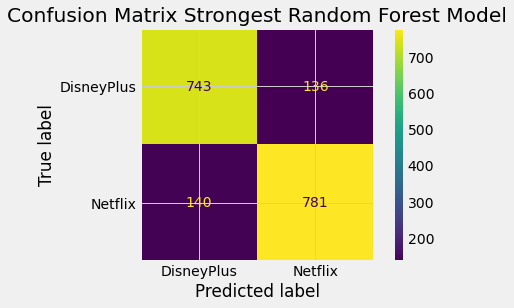

In [186]:
# show a confusion matrix with the results
plot_confusion_matrix(estimator= gs_rf.best_estimator_, 
                      X=X_test, 
                      y_true=y_test, 
                      display_labels=['DisneyPlus', 'Netflix'])
plt.title("Confusion Matrix Strongest Random Forest Model");

After using the GridSearchCV to find the best parameters for the Random Forest Classifier, the model has an accuracy score of 84.6% on the testing data (a slight increase from the original Random Forest model). Given the cross validation accuracy score of 83.1% this model looks to have decreased variance.

The gridsearched Random Forest model slighlty increased in accuracy score to 84.6%. The next option would be to either include FeatureEngineering, remove features, or try a new model.

## K-Nearest Neighbors

### KNN Baseline

This section will explore a KNN Classifier model. The first model will have no hyperparameters changed to see what the baseline accuracy score would be.

In [98]:
# insatiate the knn model
knn = KNeighborsClassifier()

# fit the model
knn.fit(X_train, y_train)

# score the model
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8171428571428572, 0.6938888888888889)

For the KNN model with no hyperparameter adjustments, we get an accuracy score of 69.38%. This is higher than the original baseline score of 50%, however it is below both of the Random Forest Classifiers that were created. This model also shows signs of overfitting due to the disparity between the training and testing scores.

In the next section, the model's hyperparameters will be gridsearched over to see if there can be some tuning done to the model to improve the accuracy score.

### KNN GridSearchCV

This section will run a GridSeachCV over the hyperparameters of the KNN Classifier model.

In [99]:
# set up the parameters for the knn model
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# insatiate teh gridsearchcv
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, verbose=1, cv=5)

# fit the knn_gs
knn_gs.fit(X_train, y_train)

# print the score and best params of the knn_gs
print(knn_gs.best_score_, knn_gs.best_params_, knn_gs.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.7376190476190476 {'n_neighbors': 9, 'p': 1, 'weights': 'distance'} 0.7383333333333333


In [127]:
knn_gs.score(X_train, y_train), knn_gs.score(X_test, y_test)

(0.9833333333333333, 0.7383333333333333)

From the above KNN model that utilized GridSearchCV, the model's accuracy score has increased slightly to 73.8%. The model also shows no clear sign of overfitting given the accuracy score of test data is higher than the cross-validated accuracy score of the training data.

This model is not stronger than our Random Forest model and we can disgard this model and focus on other models.

### Bernoulli Naive Bayes

This section will create a third type of model using Bernoulli Naive Bayes

In [100]:
# insatiate the model
bb = BernoulliNB()

# fit the model
bb.fit(X_train, y_train)

# score the training and testing data
print(bb.score(X_train, y_train), bb.score(X_test, y_test))

0.7869047619047619 0.7772222222222223


The Bernoulli Naive Bayes model has an accuracy score of 77.2% for the testing data. This score is higher than both KNN models, but below both Random Forest models. The benefit of the Naive Bayes model is it does not appear to be overfit as the accuracy scores between the training and testing data is almost equal to one another.

### Random Forest w/ Feature Engineering

This section will run a Pipeline in order to perform feature engineering and then run a Gridsearch over the parameters of the Random Forest Classifier to see if there is an improvement in the accuracy score.

In [101]:
# set up the pipeline
rf_pipe = Pipeline([('poly', PolynomialFeatures()),('rf', RandomForestClassifier())])

# set up the pipeline parameters
rf_pipe_params = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 50, 100],
    'rf__min_samples_split': [2, 3, 4, 5]
}

# insatiate the gridsearch on the pipeline
rf_gs_pipe = GridSearchCV(estimator = rf_pipe, param_grid = rf_pipe_params, cv=5, verbose=1)

# fit the gridsearched model
rf_gs_pipe.fit(X_train, y_train)

# get the score of and best params of the gridsearched model
rf_gs_pipe.best_score_, rf_gs_pipe.score(X_test, y_test), rf_gs_pipe.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


(0.8326190476190476,
 0.8411111111111111,
 {'rf__max_depth': 50, 'rf__min_samples_split': 2, 'rf__n_estimators': 100})

In [125]:
rf_gs_pipe.score(X_train, y_train),rf_gs_pipe.score(X_test, y_test),

(0.9497619047619048, 0.8411111111111111)

After running a Pipeline to perform feature engineering and then gridsearch over the parameters of the Random Forest Classifier, the accuracy score on testing data came back slightly lower (84.1%) than with no feature engineering (84.6%). While dissapointing this may have been due to the large number of features that had low feature importance scores being included in 

### Remove Features With Low Importance for Random Forest GridSearch Model

This section will return to the original GridSearched Random Forest model and remove features that had low importance scores. I am using 0.1 as a cutoff as anything below that feels like noise. Ideal features would have scores near 1, however the highest score I determined was 0.11 for title_length so we are not looking at features with very high scores here.

In [102]:
# generate a list of features and their importance for the best model 
features_list = list(zip(X_train.columns, gs_rf.best_estimator_.feature_importances_))

In [104]:
# generate a loop that will only pull features with above 1% importance. 
# the feature with the highest importance score was title_length with a score of 13%

# empty list that will be filled with names of features with a score above 1%
new_X = []

# generate a for loop
for i in range(len(features_list)):
    
    # set a condition that is tied to the feature importance score
    if features_list[i][-1] >= 0.01:
        
        #append the feature names of those features that fit the condition
        new_X.append(features_list[i][0])
        
# print the new_X list - these are the features to include in the final Random Forest model
new_X

['upvote_ratio',
 'title_length',
 'title_word_count',
 'title_sentiment_compound',
 'disney',
 'netflix',
 'star',
 'wandavision',
 'disney_selftext',
 'netflix_selftext',
 'removed_selftext',
 'disney_tfidf',
 'netflix_tfidf',
 'star_tfidf',
 'wandavision_tfidf',
 'disney_tfidf_selftext',
 'netflix_tfidf_selftext',
 'removed_tfidf_selftext']

In [105]:
# set up the new X variable
X_new = df[new_X]

# train test split the new X and original y
XN_train, XN_test, yn_train, yn_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [123]:
# insatiate the gs model - will use same params as last time
gs_rf_removed = GridSearchCV(RandomForestClassifier(), rf_params, verbose=1, cv=5)

# fit the training data
gs_rf_removed.fit(XN_train, yn_train)

# show the best score and parameters
gs_rf_removed.best_score_, gs_rf_removed.score(XN_test, yn_test), gs_rf_removed.best_params_

(0.8073809523809524,
 0.8111111111111111,
 {'max_depth': 50,
  'min_samples_split': 4,
  'n_estimators': 200,
  'random_state': 42})

In [124]:
gs_rf_removed.score(XN_train, yn_train),gs_rf_removed.score(XN_test, yn_test)

(0.9445238095238095, 0.8111111111111111)

From this final Random Forest model, because we used a limited list of features and no feature engineering the accuracy score fell to about 81.1%%. While not the most ideal scenario, this model provided the lowest accuracy score of any Random Forest model created. Should it wished to be explored deeper, feature engineering on these features could provide better results. However, given the very tight range in accuracy score between these four different Random Forest models, we seem to be approaching the maximum accuracy score possible with this data.

Options to try and obtain a higher accuracy score include scraping more data from Reddit or performing feature engineering on the above model parameters. 

### Removed Features with Feature Engineering and GridSearchCV

This section will combine the removed features from the previous model with the pipeline used in the feature engineering Random Forest model.

In [111]:
# insatiate the model
rf_gs_limited = GridSearchCV(estimator = rf_pipe, param_grid = rf_pipe_params, cv=5, verbose=1)

# fit the model on the removed feature variables
rf_gs_limited.fit(XN_train, yn_train)

# show scores and best params for this model
rf_gs_limited.best_score_, rf_gs_limited.score(XN_test, yn_test), rf_gs_limited.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


(0.8078571428571429,
 0.8155555555555556,
 {'rf__max_depth': 100, 'rf__min_samples_split': 4, 'rf__n_estimators': 150})

In [120]:
rf_gs_limited.score(XN_train, yn_train), rf_gs_limited.score(XN_test, yn_test)

(0.9466666666666667, 0.8155555555555556)

After performing feature engineering on the list of removed variables, the accuracy score only increased by 0.4% and still scored below the original Random Forest model and the GridSearch Random Forest model. 

To get a higher accuracy score a different model will need to be run or more data will need to be collected.

# Conclusion & Recommendations

Based on the word counts collected, we are able to conclude that the themes of each Subreddit is focused on new movies of TV seasons/shows/episodes.

| Model | Training Accuracy Score | Testing Accuracy Score |
| --- | --- | --- |
|Baseline (no model, just picking one Subreddit)|50%|50%|
|Random Forest Baseline|98.3%|82.89%|
|KNN Baseline|81.7%|69.3%|
|Bernoulli Naive Bayes Baseline|78.69%|77.2%|
|Random Forest GridSearchCV|95.69%|84.6%|
|KNN GridSearchCV|98.3%|73.83%|
|Random Forest Feature Engineering & GridSearchCV|94.97%|84.1%|
|Random Forest GridSeachCV: Remove Features w/ Low Importance|94.4%|81.1%|
|Random Forest Feature Engineering & GridSearchCV: Remove Features w/ Low Importance|94.6%|81.5%|

The strongest model (by measurement of accuracy score) was the GridSearchCV Random Forest model with an accuracy score of 84.6%. Given the other Random Forest models that were created all had accuracy scores within 5% of the best score, the GridSearchCV Random Forest model is at or very near the maximum accuracy score with the current data collected. 

Reccomendations for improvement include using other NLP processing tools such as BERT or GloVe. The sentiment score used above was the compounded score but other scores from the sentiment analysis could also be pulled. Another option could be to used GridSearchCV on the Bernoulli Naive Bayes model that showed the least amount of overfitting. A final reccomendation is to collect new data.

Should we choose to used the Random Forest GridSearchCV model we must accept the overfitting but also can sleep well knowing that model will return the highest accuracy score of this batch.